# Kaggle_Health_Insurance_Cost_Prediction

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
health = pd.read_csv('insurance.csv')

### columns
* age
* sex
* bmi = body mass index
* children
* smoker
* region
* charges

### 1338 lines

In [3]:
health.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
health.shape[0]

1338

In [48]:
health.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Checking for missing data

In [49]:
health.isna().values.any()

False

In [50]:
health.isnull()
health.isnull().values.any()

False

In [51]:
# change smoker column to boolean type
bool_smoker = health['smoker'].apply(lambda x: True if x == 'yes' else False)
health.update(bool_smoker)
#health[["smoker"]] = health[["smoker"]].apply(pd.to_numeric) #Faz sentido normalizar apenas essa coluna?
health.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520


In [52]:
health.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Check if it's have an outliers

In [53]:
health.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
#Let's check if y=19 is an outlier:
Q1 = health.quantile(0.25)
Q3 = health.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

health_outliers = (health < (Q1 - 1.5 * IQR)) |(health > (Q3 + 1.5 * IQR))
health_outliers[health_outliers==True]

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


,age,bmi,charges,children,region,sex,smoker
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looking the information we have in this dataset, we can try to relate the charges with age, sex and smoker. So we have to understand the correlation between this variables. Finally, we can group by region and if have children or not.

<AxesSubplot:>

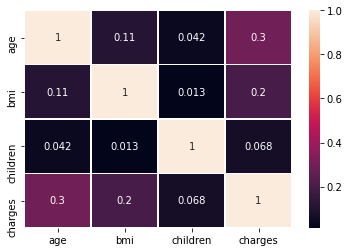

In [56]:
corr = health.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,
        linewidth=0.5)

The variable that have the most strong correlation with charges is age. So the age of a person is the factor that most influence on the charges. After that, bmi is the second.